# Example of fitting a two-dimensional MDN  with one output
-------

The idea behind this is example is to fit a mixture density network to something that is similar to a final size distribution of an epidemic. Instead of just varying a single $R_0$ parameter, we can instead vary two parameters $\alpha$ and $\beta$, with the relationship $\frac{\alpha}{\beta} = R_0$. This will then test how well the fitting can cope with uneven sampling over the main parameter dimension if its some complex function of the input dimensions.

In [1]:
%pylab inline
import sys
sys.path.append('../')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import importlib
import pydra
import gen_data_utils as gd
import seaborn as sns
importlib.reload(pydra)
importlib.reload(gd)

Using TensorFlow backend.


<module 'gen_data_utils' from '/Users/m.irvine/Dropbox/Emulation project/pydra/notebooks/gen_data_utils.py'>

In [4]:
model = pydra.Pydra(cluster_size=10,output_size=1,layers=3,input_size=2,
                       dense_layer_size=64,print_summary=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           192         input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           4160        dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 64)           4160        dense_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (D

## Set-up data

In [5]:
alpha = np.random.uniform(0,1,1000)
beta = np.random.uniform(1,2,1000)
x = alpha/beta

In [6]:
_,y = gd.final_size(x=x)


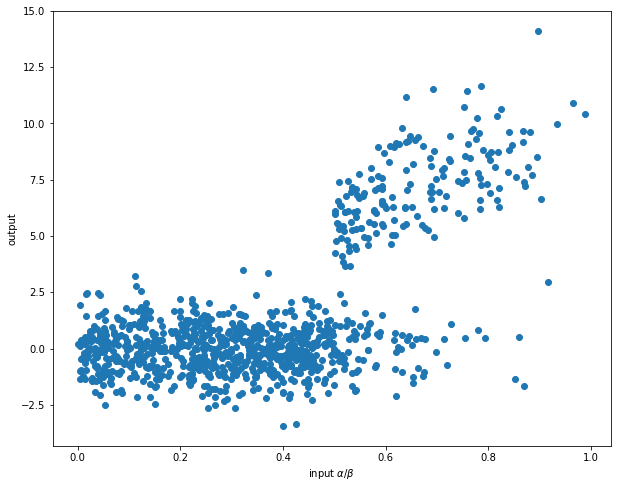

In [10]:
plt.figure(figsize=(10,8));
plt.plot(x,y,'o');
plt.xlabel(r'input $\alpha/\beta$');
plt.ylabel('output');

In [11]:
def shape_for_mdn(x):
    return x.reshape(x.size,1)
x = shape_for_mdn(x)
alpha = shape_for_mdn(alpha)
beta = shape_for_mdn(beta)

In [12]:
data = np.hstack((alpha,beta))

In [13]:
history = model.fit(data, y, epochs=500, batch_size=500,
          verbose=1)

Epoch 1/500
1000/1000 [==============================] - 0s 151us/step - loss: 3.7688
Epoch 2/500
1000/1000 [==============================] - 0s 23us/step - loss: 3.4262
Epoch 3/500
1000/1000 [==============================] - 0s 27us/step - loss: 3.0996
Epoch 4/500
1000/1000 [==============================] - 0s 19us/step - loss: 2.8150
Epoch 5/500
1000/1000 [==============================] - 0s 19us/step - loss: 2.5805
Epoch 6/500
1000/1000 [==============================] - 0s 22us/step - loss: 2.4163
Epoch 7/500
1000/1000 [==============================] - 0s 19us/step - loss: 2.3147
Epoch 8/500
1000/1000 [==============================] - 0s 18us/step - loss: 2.2506
Epoch 9/500
1000/1000 [==============================] - 0s 18us/step - loss: 2.2187
Epoch 10/500
1000/1000 [==============================] - 0s 18us/step - loss: 2.2050
Epoch 11/500
1000/1000 [==============================] - 0s 20us/step - loss: 2.2017
Epoch 12/500
1000/1000 [==============================] - 0s 2

1000/1000 [==============================] - 0s 22us/step - loss: 1.7014
Epoch 97/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.7005
Epoch 98/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.6980
Epoch 99/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.6943
Epoch 100/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.6923
Epoch 101/500
1000/1000 [==============================] - ETA: 0s - loss: 1.667 - 0s 20us/step - loss: 1.6902
Epoch 102/500
1000/1000 [==============================] - ETA: 0s - loss: 1.663 - 0s 20us/step - loss: 1.6870
Epoch 103/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.6859
Epoch 104/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.6837
Epoch 105/500
1000/1000 [==============================] - 0s 15us/step - loss: 1.6829
Epoch 106/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.6807
Epoch 107/50

Epoch 189/500
1000/1000 [==============================] - 0s 19us/step - loss: 1.6345
Epoch 190/500
1000/1000 [==============================] - 0s 23us/step - loss: 1.6394
Epoch 191/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6441
Epoch 192/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6429
Epoch 193/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6432
Epoch 194/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6398
Epoch 195/500
1000/1000 [==============================] - 0s 19us/step - loss: 1.6419
Epoch 196/500
1000/1000 [==============================] - 0s 22us/step - loss: 1.6402
Epoch 197/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6367
Epoch 198/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6340
Epoch 199/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.6315
Epoch 200/500
1000/1000 [==================

1000/1000 [==============================] - 0s 17us/step - loss: 1.6146
Epoch 283/500
1000/1000 [==============================] - 0s 21us/step - loss: 1.6145
Epoch 284/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.6145
Epoch 285/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6163
Epoch 286/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.6181
Epoch 287/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.6191
Epoch 288/500
1000/1000 [==============================] - 0s 19us/step - loss: 1.6160
Epoch 289/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6145
Epoch 290/500
1000/1000 [==============================] - 0s 19us/step - loss: 1.6189
Epoch 291/500
1000/1000 [==============================] - 0s 19us/step - loss: 1.6137
Epoch 292/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.6154
Epoch 293/500
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 18us/step - loss: 1.6104
Epoch 376/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6059
Epoch 377/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6140
Epoch 378/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.6108
Epoch 379/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.6046
Epoch 380/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.6145
Epoch 381/500
1000/1000 [==============================] - 0s 15us/step - loss: 1.6120
Epoch 382/500
1000/1000 [==============================] - 0s 14us/step - loss: 1.6086
Epoch 383/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.6103
Epoch 384/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.6068
Epoch 385/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6132
Epoch 386/500
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 22us/step - loss: 1.6020
Epoch 469/500
1000/1000 [==============================] - 0s 22us/step - loss: 1.6053
Epoch 470/500
1000/1000 [==============================] - 0s 19us/step - loss: 1.6022
Epoch 471/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.5996
Epoch 472/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.6025
Epoch 473/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6006
Epoch 474/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6040
Epoch 475/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6030
Epoch 476/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.5998
Epoch 477/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.6047
Epoch 478/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6041
Epoch 479/500
1000/1000 [==============================] 

## Plot Loss for each output

In [14]:
print(history.history.keys())

dict_keys(['loss'])


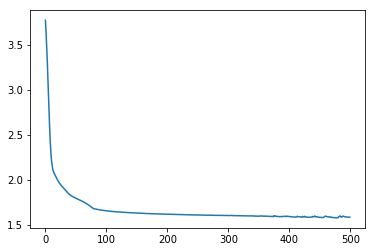

In [11]:
plt.plot(history.history['loss']);

## Test output results

In [12]:
alpha_test = np.random.uniform(0,1,5000)
beta_test = np.random.uniform(1,2,5000)
x_test = alpha_test/beta_test
alpha_test = shape_for_mdn(alpha_test)
beta_test = shape_for_mdn(beta_test)
data_test = np.hstack((alpha_test,beta_test))

In [13]:
output = model.predict(data_test)

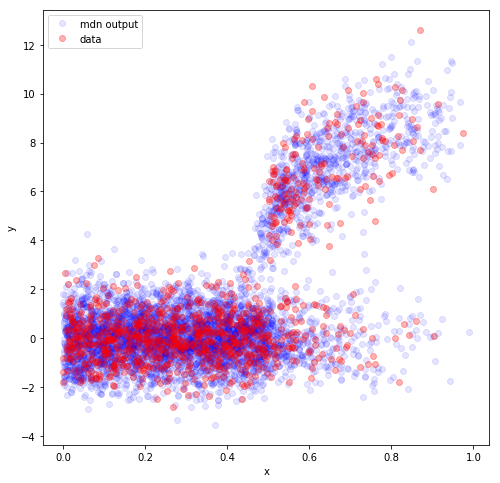

In [14]:
y_test = pydra.generate_mdn_sample_from_ouput(output, x_test.size)
plt.figure(figsize=(8, 8))

plt.plot(x_test,y_test,'bo',alpha=0.1,label='mdn output')
plt.plot(x,y,'ro',alpha=0.3,label='data')
plt.legend();plt.xlabel('x');plt.ylabel('y');